In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from IPython.display import display

In [7]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set(style="whitegrid")

### Importação dos dados



In [8]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [10]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [12]:
print("Estrutura dos dados da Loja 1:")
print("------------------------------")
print(loja.info())
print("\nPrimeiras linhas da Loja 1:")
print("---------------------------")
display(loja.head())

Estrutura dos dados da Loja 1:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  Loja                    2359 non-null   object 
dtypes: float64(4), int64(2), object

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [13]:
dados_completos = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [14]:
print("\nEstrutura dos dados combinados:")
print("---------------------------------")
print(dados_completos.info())
print("\nResumo estatístico dos dados numéricos:")
print("---------------------------------------")
display(dados_completos.describe())


Estrutura dos dados combinados:
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), o

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000


In [15]:
print(" ⬇️ Valores ausentes por coluna:")
display(dados_completos.isnull().sum())

 ⬇️ Valores ausentes por coluna:


,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


#1. Análise do faturamento


In [16]:
print("⬇️ Análise do faturamento.")
print()
print("↪️ Criando função para calcular o faturamento total de cada loja.")
print()

def calcular_faturamento(dados):
    faturamento = dados.groupby('Loja')['Preço'].sum().reset_index()
    faturamento.columns = ['Loja', 'Faturamento']
    return faturamento

faturamento_lojas = calcular_faturamento(dados_completos)
print("\nFaturamento total por loja:")
print("----------------------------")
display(faturamento_lojas)

⬇️ Análise do faturamento.

↪️ Criando função para calcular o faturamento total de cada loja.


Faturamento total por loja:
----------------------------


,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


⬇️ Visualização do faturamento através do gráfico de barras.



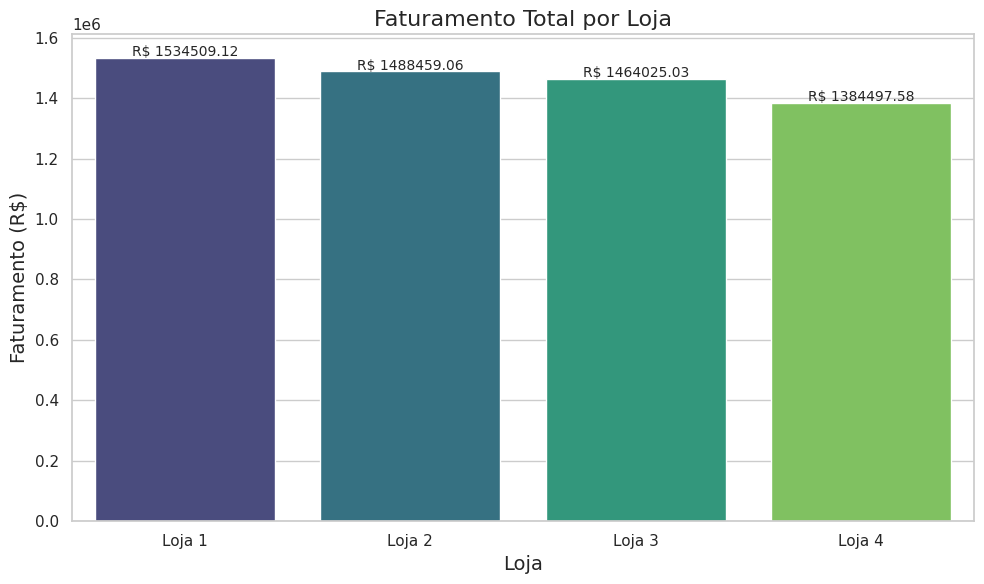

In [17]:
print("⬇️ Visualização do faturamento através do gráfico de barras.")
print()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Faturamento', data=faturamento_lojas, hue='Loja', palette='viridis', legend=False)
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)

# Adicionando valores nas barras
for i, valor in enumerate(faturamento_lojas['Faturamento']):
    ax.text(i, valor + 5000, f'R$ {valor:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [18]:
print("⬇️ Criando função para analisar vendas por categoria.")

def analisar_categorias(dados):
    categorias_por_loja = dados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')
    return categorias_por_loja

categorias_vendas = analisar_categorias(dados_completos)
print("\nQuantidade de vendas por categoria em cada loja:")
print("-------------------------------------------------")
display(categorias_vendas)

⬇️ Criando função para analisar vendas por categoria.

Quantidade de vendas por categoria em cada loja:
-------------------------------------------------


,Loja,Categoria do Produto,Quantidade
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
6,Loja 1,moveis,465
7,Loja 1,utilidades domesticas,171
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305


In [19]:
print("⬇️ Criando função para analisar vendas por categoria.")

def analisar_categorias(dados):
    categorias_por_loja = dados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')
    return categorias_por_loja

categorias_vendas = analisar_categorias(dados_completos)
print("\nQuantidade de vendas por categoria em cada loja:")
print("-------------------------------------------------")
display(categorias_vendas)

⬇️ Criando função para analisar vendas por categoria.

Quantidade de vendas por categoria em cada loja:
-------------------------------------------------


,Loja,Categoria do Produto,Quantidade
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
6,Loja 1,moveis,465
7,Loja 1,utilidades domesticas,171
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305


In [20]:
print("⬇️ Identificando a categoria mais vendida em cada loja.")
print()
categorias_mais_vendidas = categorias_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, False])
categorias_mais_vendidas_por_loja = categorias_mais_vendidas.groupby('Loja').first().reset_index()
print("\nCategoria mais vendida por loja:")
print("---------------------------------")
display(categorias_mais_vendidas_por_loja[['Loja', 'Categoria do Produto', 'Quantidade']])

⬇️ Identificando a categoria mais vendida em cada loja.


Categoria mais vendida por loja:
---------------------------------


,Loja,Categoria do Produto,Quantidade
0,Loja 1,moveis,465
1,Loja 2,moveis,442
2,Loja 3,moveis,499
3,Loja 4,moveis,480


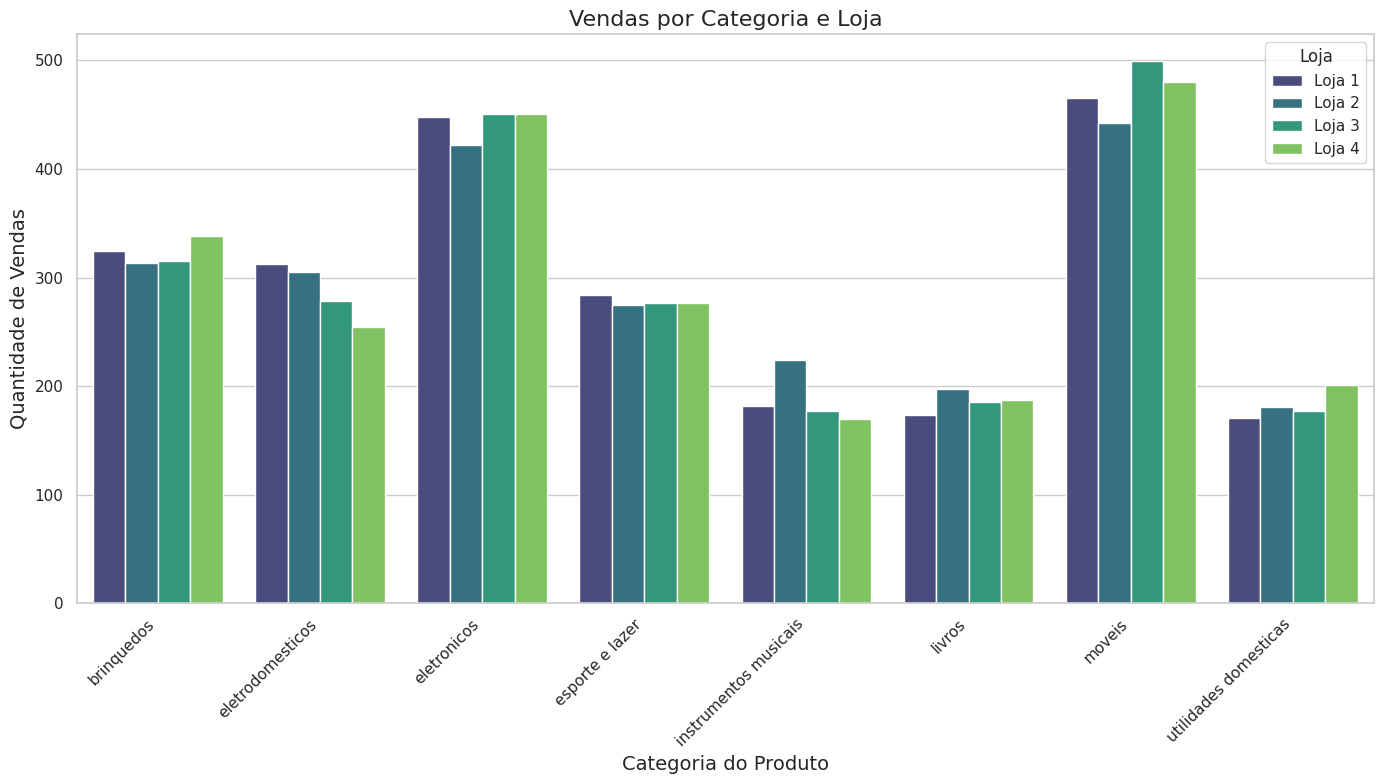

In [21]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Categoria do Produto', y='Quantidade', hue='Loja', data=categorias_vendas, palette='viridis')
plt.title('Vendas por Categoria e Loja', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

⬇️ Criando gráficos de pizza para as categorias mais vendidas em cada loja.



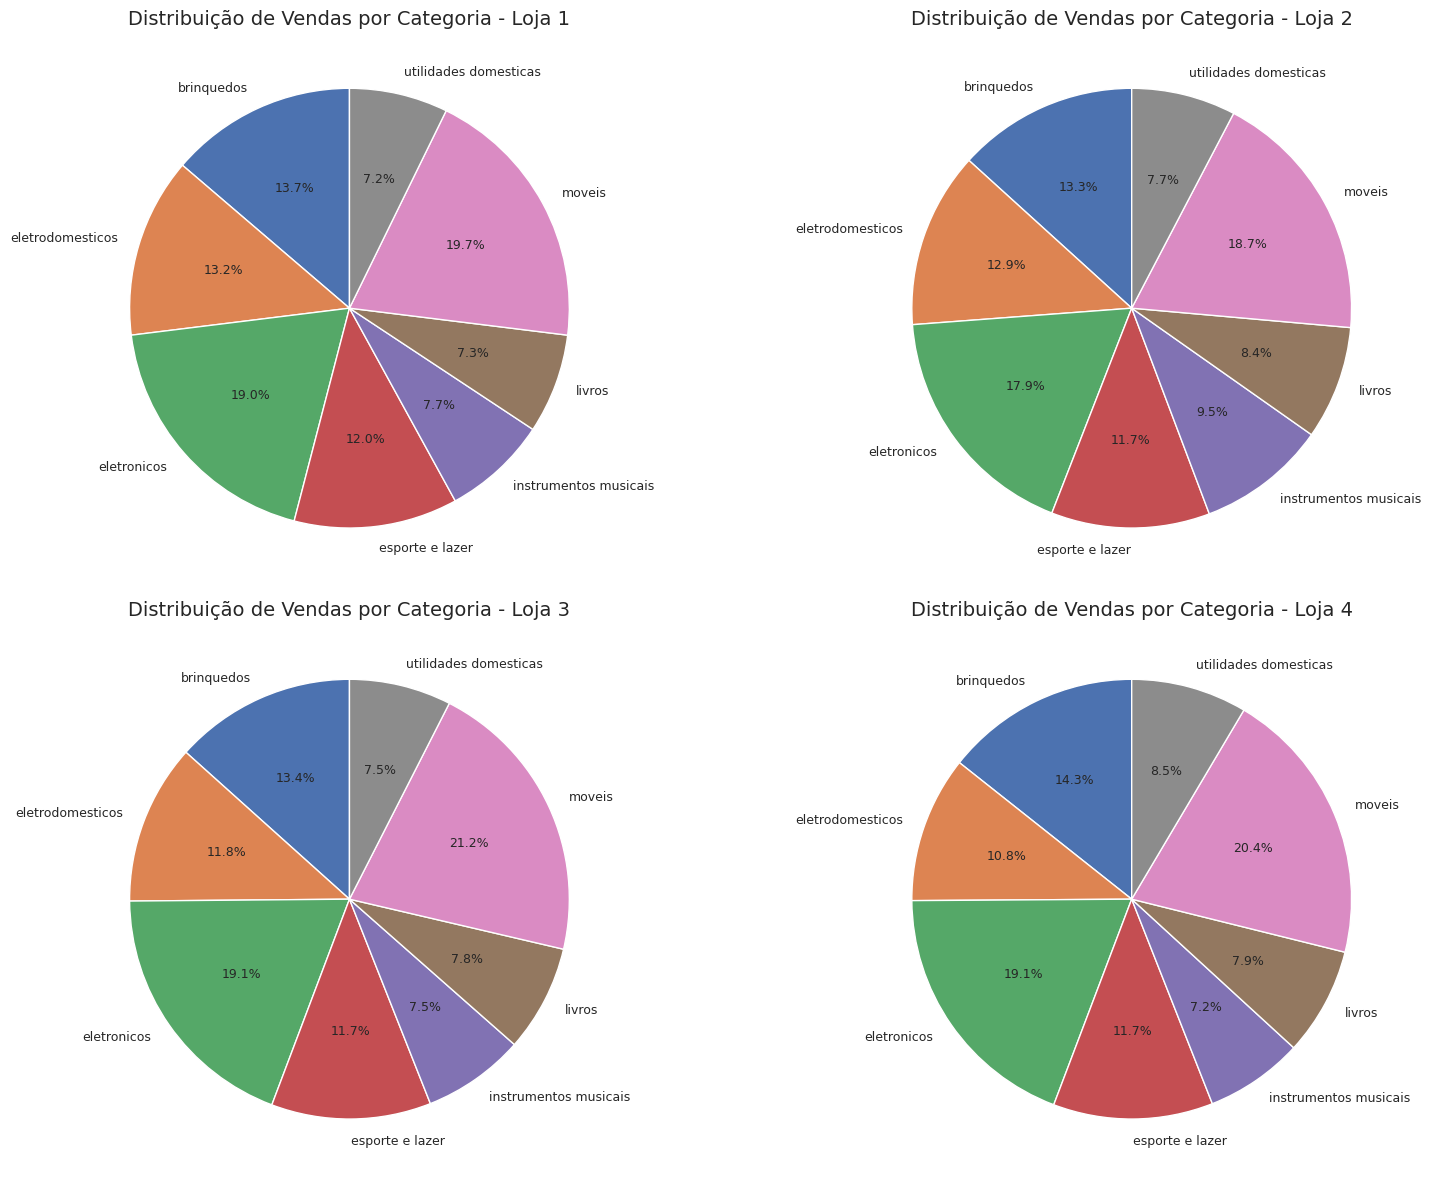

In [22]:
print("⬇️ Criando gráficos de pizza para as categorias mais vendidas em cada loja.")
print()
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, loja in enumerate(lojas):
    dados_loja = categorias_vendas[categorias_vendas['Loja'] == loja]
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        dados_loja['Quantidade'],
        labels=dados_loja['Categoria do Produto'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 9}
    )
    ax.set_title(f'Distribuição de Vendas por Categoria - {loja}', fontsize=14)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [23]:
print(" ⬇️ Média de Avaliação das Lojas. \n    Avaliação da Compra: Feedback dos clientes.")
print()
def calcular_avaliacao_media(dados):
    avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
    avaliacao_media.columns = ['Loja', 'Avaliação Média']
    return avaliacao_media

avaliacao_lojas = calcular_avaliacao_media(dados_completos)
print("\nAvaliação média por loja:")
print("--------------------------")
display(avaliacao_lojas)

 ⬇️ Média de Avaliação das Lojas. 
    Avaliação da Compra: Feedback dos clientes.


Avaliação média por loja:
--------------------------


,Loja,Avaliação Média
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


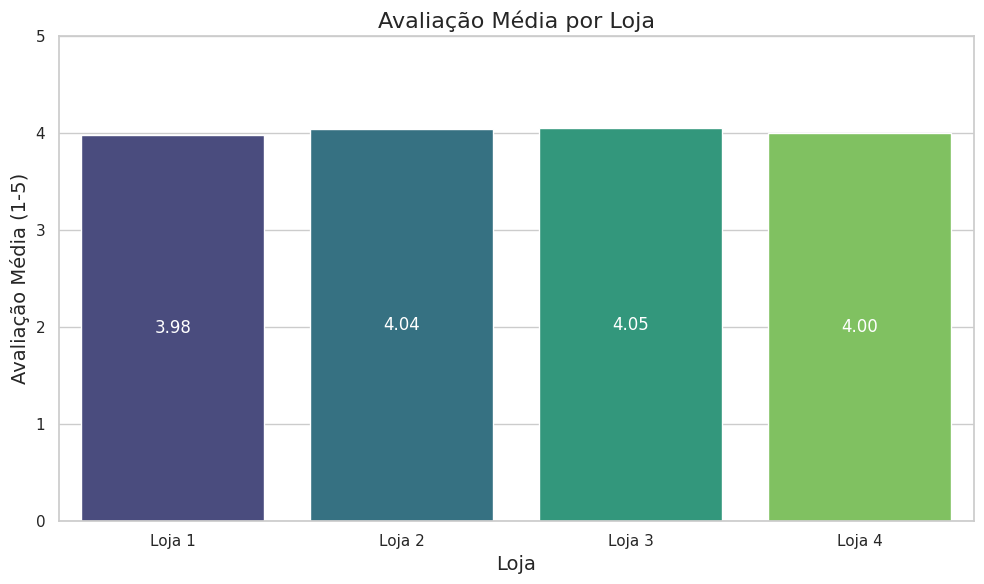

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Avaliação Média', data=avaliacao_lojas, hue='Loja', palette='viridis', legend=False)
plt.title('Avaliação Média por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Avaliação Média (1-5)', fontsize=14)
plt.ylim(0, 5)

# Adicionando os valores dentro das barras
for i, valor in enumerate(avaliacao_lojas['Avaliação Média']):
    ax.text(i, valor / 2, f'{valor:.2f}', ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [25]:
print(" ➡️ Produtos Mais e Menos Vendidos")
print()
print("     ↪️ Criando função para analisar produtos mais e menos vendidos.")
print()
def analisar_produtos(dados):
    produtos_por_loja = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')
    return produtos_por_loja

produtos_vendas = analisar_produtos(dados_completos)

 ➡️ Produtos Mais e Menos Vendidos

     ↪️ Criando função para analisar produtos mais e menos vendidos.



In [26]:
top_produtos = produtos_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, False])
top_produtos_por_loja = top_produtos.groupby('Loja').head(5)
print("\nTop 5 produtos mais vendidos por loja:")
print("----------------------------------------------")
display(top_produtos_por_loja)


Top 5 produtos mais vendidos por loja:
----------------------------------------------


,Loja,Produto,Quantidade
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
91,Loja 2,Pandeiro,58
100,Loja 2,Violão,58


In [27]:
bottom_produtos = produtos_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, True])
bottom_produtos_por_loja = bottom_produtos.groupby('Loja').head(5)
print("\nTop 5 produtos menos vendidos por loja:")
print("------------------------------------------------")
display(bottom_produtos_por_loja)


Top 5 produtos menos vendidos por loja:
------------------------------------------------


,Loja,Produto,Quantidade
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
40,Loja 1,Pandeiro,36
13,Loja 1,Ciência de dados com python,39
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
93,Loja 2,Poltrona,35
73,Loja 2,Fone de ouvido,37


➡️ Top 5 produtos mais vendidos por loja:
----------------------------------------------


,Loja,Produto,Quantidade
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
91,Loja 2,Pandeiro,58
100,Loja 2,Violão,58




➡️ Produtos mais vendidos por loja - Visualização através do método Gráfico de barras.
--------------------------------------------------------------------------------------


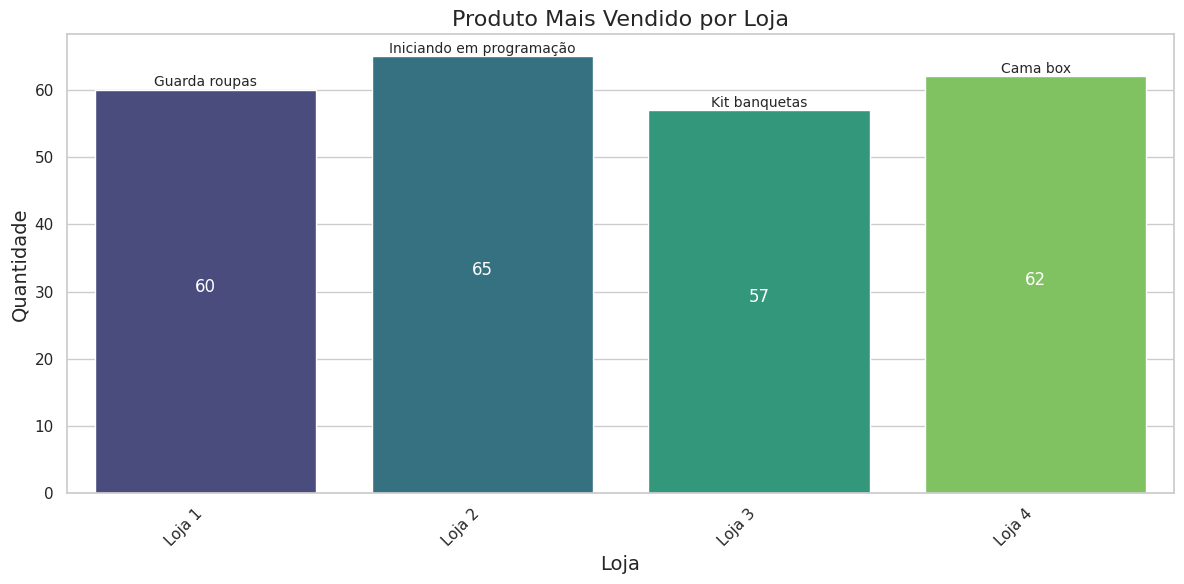

In [28]:
# Top 5 produtos mais vendidos por loja
top_produtos = produtos_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, False])
top_produtos_por_loja = top_produtos.groupby('Loja').head(5)
produtos_mais_vendidos = top_produtos_por_loja.groupby('Loja').first().reset_index() # Define 'produtos_mais_vendidos'
print("➡️ Top 5 produtos mais vendidos por loja:")
print("----------------------------------------------")
display(top_produtos_por_loja)
print()
print()

print("➡️ Produtos mais vendidos por loja - Visualização através do método Gráfico de barras.")
print("--------------------------------------------------------------------------------------")

plt.figure(figsize=(12, 6)) # Cria a figura
ax = sns.barplot(x='Loja', y='Quantidade', hue='Loja', data=produtos_mais_vendidos, palette='viridis', legend=False) # Define 'hue' como 'Loja' e desativa a legenda
plt.title('Produto Mais Vendido por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adiciona os rótulos
for i, row in enumerate(produtos_mais_vendidos.itertuples()):
    ax.text(i, row.Quantidade + 0.5, row.Produto, ha='center', fontsize=10, rotation=0)
    ax.text(i, row.Quantidade/2, str(row.Quantidade), ha='center', fontsize=12, color='white')

plt.show()

# 5. Frete Médio por Loja


In [29]:
print("➡️ Frete Médio por Loja")
print()
print("↪️ Criando função para calcular o frete médio por loja.")
print()

def calcular_frete_medio(dados):
    frete_medio = dados.groupby('Loja')['Frete'].mean().reset_index()
    frete_medio.columns = ['Loja', 'Frete Médio']
    return frete_medio

frete_lojas = calcular_frete_medio(dados_completos)
print("\nFrete médio por loja:")
display(frete_lojas)

➡️ Frete Médio por Loja

↪️ Criando função para calcular o frete médio por loja.


Frete médio por loja:


,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


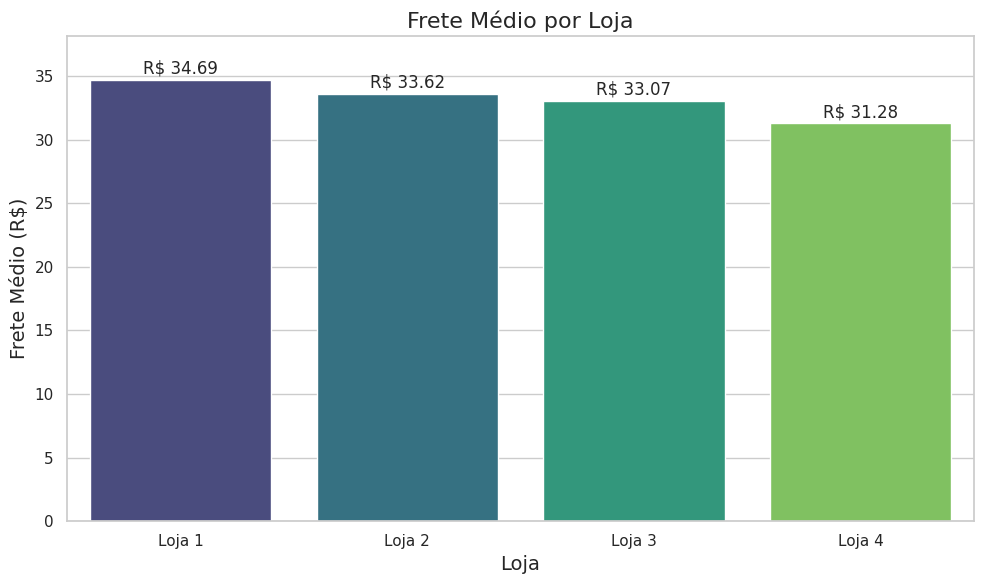

In [30]:
# Ordena as barras por frete médio
frete_lojas = frete_lojas.sort_values('Frete Médio', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Frete Médio', data=frete_lojas, palette='viridis', hue='Loja', legend=False)
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Frete Médio (R$)', fontsize=14)

# Adiciona rótulos com os valores dos fretes médios
for i, valor in enumerate(frete_lojas['Frete Médio']):
    ax.text(i, valor + 0.5, f'R$ {valor:.2f}', ha='center', fontsize=12)

# Ajusta os limites do eixo y
plt.ylim(0, frete_lojas['Frete Médio'].max() * 1.1)

plt.tight_layout()
plt.show()

In [31]:
resumo_lojas = pd.DataFrame({
    'Loja': faturamento_lojas['Loja'],
    'Faturamento': faturamento_lojas['Faturamento'],
    'Avaliação Média': avaliacao_lojas['Avaliação Média'],
    'Frete Médio': frete_lojas['Frete Médio']
})

In [32]:
resumo_lojas = pd.merge(resumo_lojas, categorias_mais_vendidas_por_loja[['Loja', 'Categoria do Produto']], on='Loja')
resumo_lojas.rename(columns={'Categoria do Produto': 'Categoria Mais Vendida'}, inplace=True)

In [33]:
resumo_lojas = pd.merge(resumo_lojas, produtos_mais_vendidos[['Loja', 'Produto', 'Quantidade']], on='Loja')
resumo_lojas.rename(columns={'Produto': 'Produto Mais Vendido', 'Quantidade': 'Qtd. Produto Mais Vendido'}, inplace=True)

print("\nResumo comparativo das lojas:")
print("------------------------------")
display(resumo_lojas)


Resumo comparativo das lojas:
------------------------------


,Loja,Faturamento,Avaliação Média,Frete Médio,Categoria Mais Vendida,Produto Mais Vendido,Qtd. Produto Mais Vendido
0,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60
1,Loja 2,1488459.06,4.037304,33.621941,moveis,Iniciando em programação,65
2,Loja 3,1464025.03,4.048326,33.074464,moveis,Kit banquetas,57
3,Loja 4,1384497.58,3.995759,31.278997,moveis,Cama box,62



Correlação entre preço, frete e avaliação:
--------------------------------------------


,Preço,Frete,Avaliação da compra
Preço,1.000000,0.997711,0.001421
Frete,0.997711,1.000000,0.000749
Avaliação da compra,0.001421,0.000749,1.000000


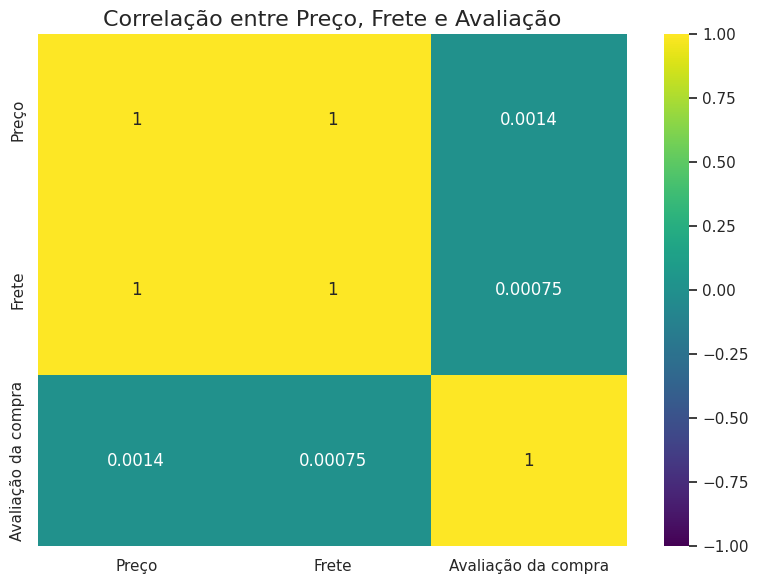

In [34]:
correlacao = dados_completos[['Preço', 'Frete', 'Avaliação da compra']].corr()
print("\nCorrelação entre preço, frete e avaliação:")
print("--------------------------------------------")
display(correlacao)

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlação entre Preço, Frete e Avaliação', fontsize=16)
plt.tight_layout()
plt.show()

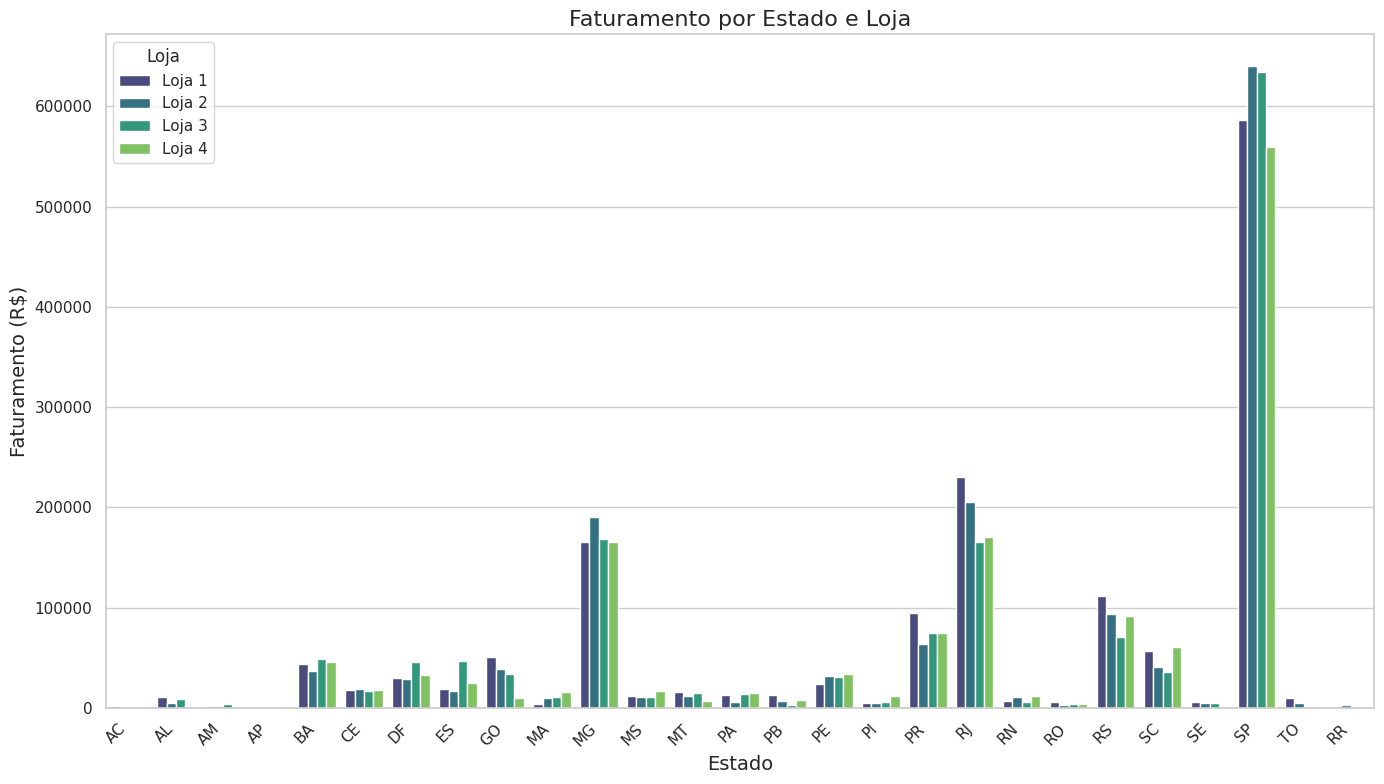

In [35]:
faturamento_por_estado = dados_completos.groupby(['Loja', 'Local da compra'])['Preço'].sum().reset_index()
faturamento_por_estado.columns = ['Loja', 'Estado', 'Faturamento']

plt.figure(figsize=(14, 8))
sns.barplot(x='Estado', y='Faturamento', hue='Loja', data=faturamento_por_estado, palette='viridis')
plt.title('Faturamento por Estado e Loja', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

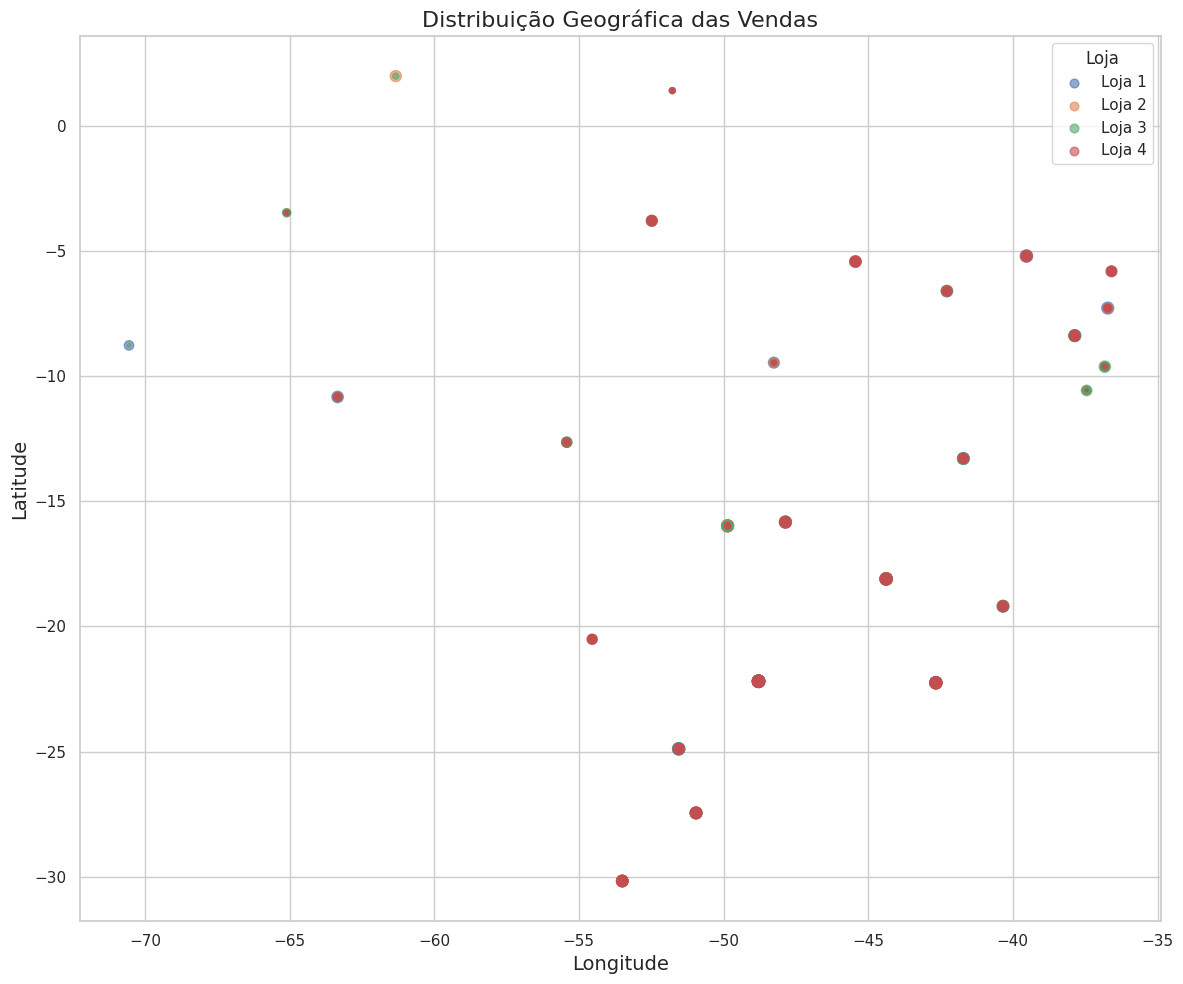

In [36]:
plt.figure(figsize=(12, 10))
for loja in lojas:
    dados_loja = dados_completos[dados_completos['Loja'] == loja]
    plt.scatter(
        dados_loja['lon'],
        dados_loja['lat'],
        alpha=0.6,
        label=loja,
        s=dados_loja['Preço']/50  # Tamanho proporcional ao preço
    )

plt.title('Distribuição Geográfica das Vendas', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
resumo_lojas['Rank Faturamento'] = resumo_lojas['Faturamento'].rank(ascending=True)
resumo_lojas['Rank Avaliação'] = resumo_lojas['Avaliação Média'].rank(ascending=True)
resumo_lojas['Rank Frete'] = resumo_lojas['Frete Médio'].rank(ascending=False)  # Menor frete é melhor (rank maior)

In [38]:
resumo_lojas['Pontuação Total'] = resumo_lojas['Rank Faturamento'] + resumo_lojas['Rank Avaliação'] + resumo_lojas['Rank Frete']

display(resumo_lojas[['Loja', 'Faturamento', 'Rank Faturamento',
                     'Avaliação Média', 'Rank Avaliação',
                     'Frete Médio', 'Rank Frete',
                     'Pontuação Total']])

,Loja,Faturamento,Rank Faturamento,Avaliação Média,Rank Avaliação,Frete Médio,Rank Frete,Pontuação Total
0,Loja 1,1534509.12,4.0,3.976685,1.0,34.691805,1.0,6.0
1,Loja 2,1488459.06,3.0,4.037304,3.0,33.621941,2.0,8.0
2,Loja 3,1464025.03,2.0,4.048326,4.0,33.074464,3.0,9.0
3,Loja 4,1384497.58,1.0,3.995759,2.0,31.278997,4.0,7.0


In [39]:
loja_recomendada = resumo_lojas.sort_values('Pontuação Total').iloc[0]['Loja']
print(f" ➡️ A loja recomendada para venda é: {loja_recomendada}")

 ➡️ A loja recomendada para venda é: Loja 1


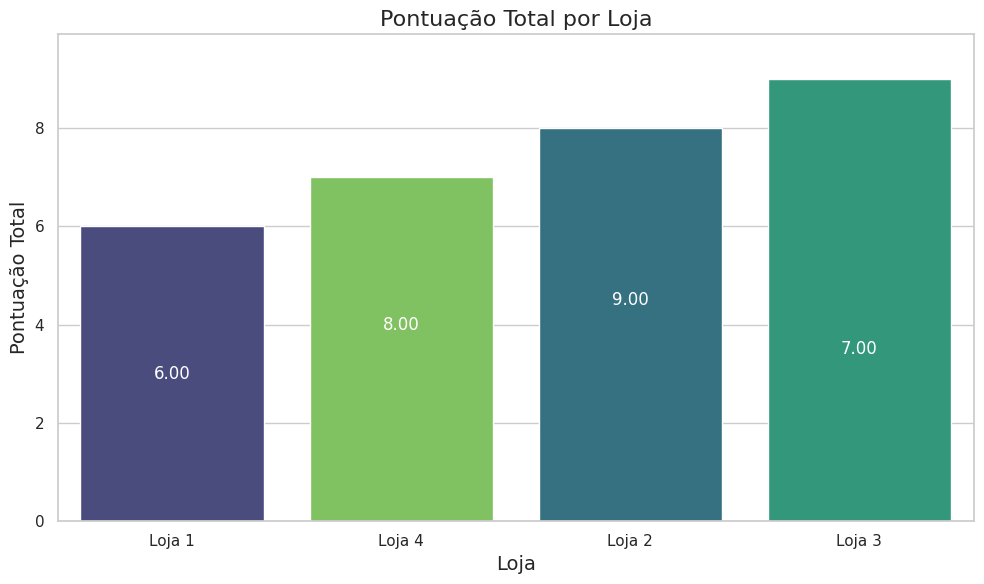

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Pontuação Total', hue='Loja', data=resumo_lojas, palette='viridis', legend=False,  # Define 'hue' como 'Loja' e desativa a legenda
                 order=resumo_lojas.sort_values('Pontuação Total')['Loja'])
plt.title('Pontuação Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Pontuação Total', fontsize=14);

plt.ylim(0, resumo_lojas['Pontuação Total'].max() * 1.1)

# Para exibir a pontuação dentro das barras
for i, valor in enumerate(resumo_lojas['Pontuação Total']):
    ax.text(i, valor / 2, f'{valor:.2f}', ha='center', va='center',
            color='white', fontsize=12)  # Posição, formatação e cor do texto

plt.tight_layout()
plt.show()

> A partir do estudo aprofundado dos dados de vendas, feedback dos clientes e métricas de desempenho das quatro lojas da Alura Store, eu, Juliane Borges, na condição de Cientista de Dados formalizo minha recomendação referente à estratégia de venda ao proprietário da rede de lojas Alura Sore - Sr. João.
<br><br>
>> Unidade de negócio a ser vendida: loja 1
<br><br>
> Tendo em vista as informações contidas nos csv`s, inicialmente, "carregados" nessa IDE e manipulados para averiguação dos valores e tomada de decisão como demonstra a tabela abaixo.





> **Critérios adotados:** <br><br>
> Um sistema de pontuação para ranquear as lojas e identificar a unidade de negócio com a menor pontuação. A pontuação total de cada loja é calculada somando os rankings individuais de três atributos: <br>

> **Faturamento:** As lojas são classificadas pelo seu faturamento, recebendo um rank de 1 a 4, onde 1 representa o maior faturamento e 4 o menor.<br>

> **Avaliação Média:** As lojas são classificadas pela sua avaliação média dos clientes, recebendo um ranking de 1 a 4, onde 1 representa a melhor avaliação e 4 a pior.<br>

> **Frete Médio:** As lojas são classificadas pelo seu frete médio, recebendo um rank de 1 a 4, onde 1 representa o menor frete e 4 o maior.<br>

>  A Loja 1 obteve a menor pontuação total devido seu desempenho inferior nos quesitos -  Avaliação Média e Frete Médio (R$) - , sendo considerada menos competitiva e de maior propensão à venda. <br> Além dos fundamentos, anteriormente mencionados, o estabelecimento 1 - sob a ótica da distribuição geográfica - apresenta vendas concentradas em uma única região o que caracteriza uma certa limitação.